In [8]:
import tensorflow as tf
import cv2
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def load_model():
   model=tf.keras.models.load_model('./models/xray_model.hdf5', compile=False)
   model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

   return model


In [5]:
def import_and_predict(image_data, model):
    
   size = (180,180)    
   image = ImageOps.fit(image_data, size, Image.Resampling.LANCZOS)
   image = np.asarray(image)
   img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   img_reshape = img[np.newaxis,...]
   prediction = model.predict(img_reshape)
        
   return prediction

In [6]:
model=load_model()

/home/flavio/anaconda3/envs/myenv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-05-27 18:13:50.400204: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


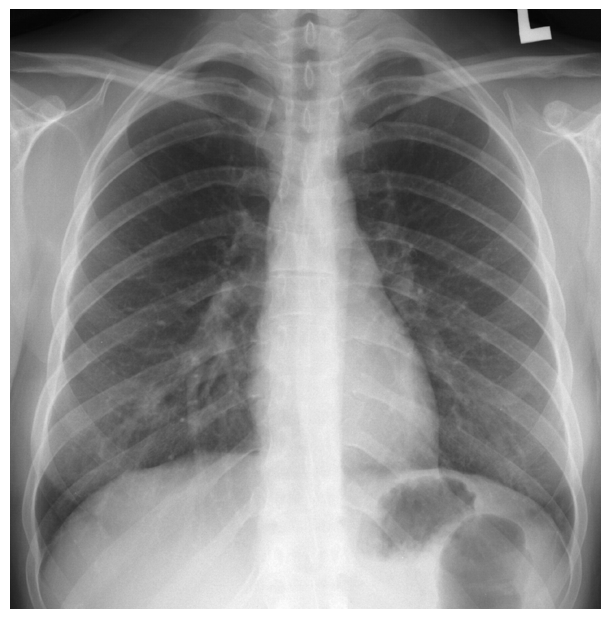

In [15]:
#image = Image.open('images/IM-0025-0001.jpeg')
#image = Image.open('images/person20_virus_51.jpeg')
image = Image.open('images/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg')
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.axis('off')  # Oculta os eixos
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove margens
plt.show()

In [16]:
predictions = import_and_predict(image, model)
score = tf.nn.softmax(predictions[0])
class_names = ['NORMAL', 'PNEUMONIA']
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
This image most likely belongs to PNEUMONIA with a 61.59 percent confidence.
